In [11]:
"""MC1-P1: Analyze a portfolio."""
import sys
sys.path.append('/Users/tiansu/Documents/git/ml4t/ML4T_2017Summer/')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from util import get_data, plot_data
%matplotlib inline

def cal_daily_portfolio_val(prices, allocs, start_val):
    """
    calculate daily portfolio values
    """
    df = prices / prices.ix[0]
    df = df * allocs * start_val
    return df.sum(axis=1)

def cal_portfolio_stats(port_val, rfr=0, sf=252):
    """
    calculate cr, adr, sddr, sr, ev
    """
    # Cumulative return
    cr = (port_val[-1] / port_val[0]) - 1 
    # Average period return
    daily_return = (port_val / port_val.shift(1)) - 1
    adr = daily_return.mean()
    # Standard deviation of daily return
    sddr = daily_return.std()
    # Sharpe ratio
    sr = ((daily_return - rfr).mean() / sddr) * np.sqrt(sf)

    return cr, adr, sddr, sr

# This is the function that will be tested by the autograder
# The student must update this code to properly implement the functionality
def assess_portfolio(sd = dt.datetime(2008,1,1), ed = dt.datetime(2009,1,1), \
    syms = ['GOOG','AAPL','GLD','XOM'], \
    allocs=[0.1,0.2,0.3,0.4], \
    sv=1000000, rfr=0.0, sf=252.0, \
    gen_plot=False):

    # Read in adjusted closing prices for given symbols, date range
    dates = pd.date_range(sd, ed)
    prices_all = get_data(syms, dates)  # automatically adds SPY
    prices = prices_all[syms]  # only portfolio symbols
    prices_SPY = prices_all['SPY']  # only SPY, for comparison later

    # Get daily portfolio value
    port_val = cal_daily_portfolio_val(prices, allocs, sv) # add code here to compute daily portfolio values
    # print port_val
    # Get portfolio statistics (note: std_daily_ret = volatility)
    cr, adr, sddr, sr = cal_portfolio_stats(port_val, rfr=0, sf=252)
    # [0.25, 0.001, 0.0005, 2.1] # add code here to compute stats
    
    # Compare daily portfolio value with SPY using a normalized plot
    if gen_plot:
        # add code to plot here
        df_temp = pd.concat([port_val, prices_SPY], keys=['Portfolio', 'SPY'], axis=1)
        pass

    # Add code here to properly compute end value
    ev = port_val.ix[-1]

    return cr, adr, sddr, sr, ev, df_temp

def test_code():
    # This code WILL NOT be tested by the auto grader
    # It is only here to help you set up and test your code

    # Define input parameters
    # Note that ALL of these values will be set to different values by
    # the autograder!
    start_date = dt.datetime(2009,1,1)
    end_date = dt.datetime(2010,1,1)
    symbols = ['GOOG', 'AAPL', 'GLD', 'XOM']
    allocations = [0.2, 0.3, 0.4, 0.1]
    start_val = 1000000  
    risk_free_rate = 0.0
    sample_freq = 252

    # Assess the portfolio
    cr, adr, sddr, sr, ev, df_temp = assess_portfolio(sd = start_date, ed = end_date,\
        syms = symbols, \
        allocs = allocations,\
        sv = start_val, \
        gen_plot = True)

    # Print statistics
    print "Start Date:", start_date
    print "End Date:", end_date
    print "Symbols:", symbols
    print "Allocations:", allocations
    print "Sharpe Ratio:", sr
    print "Volatility (stdev of daily returns):", sddr
    print "Average Daily Return:", adr
    print "Cumulative Return:", cr
    return df_temp

In [6]:
df_temp = test_code()

Start Date: 2009-01-01 00:00:00
End Date: 2010-01-01 00:00:00
Symbols: ['GOOG', 'AAPL', 'GLD', 'XOM']
Allocations: [0.2, 0.3, 0.4, 0.1]
Sharpe Ratio: 2.79622139929
Volatility (stdev of daily returns): 0.0119577327574
Average Daily Return: 0.00210629951522
Cumulative Return: 0.665786603962


In [9]:
a = df_temp/df_temp.ix[0]

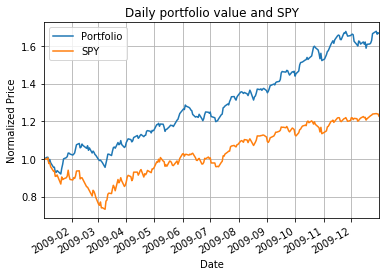

In [20]:

a = df_temp/df_temp.ix[0]
a.plot()
plt.legend()
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.grid()
plt.title('Daily portfolio value and SPY')
plt.savefig('plot.png')